In [93]:
import pandas as pd
import numpy as np
from plot import plotstart

raw = pd.read_csv("/Users/nickmisiiuk/dev/PHYS369/data/legac+gz.csv")

low_mag = raw[(raw["ip_mag"] <= 22) & (raw["zp_mag"] <= 22)] #remove high magnitude galaxies and reduce uncertainty

gal_smooth = low_mag[low_mag["type"] == "S"]

gal_feat = low_mag[low_mag["type"] == "F"]

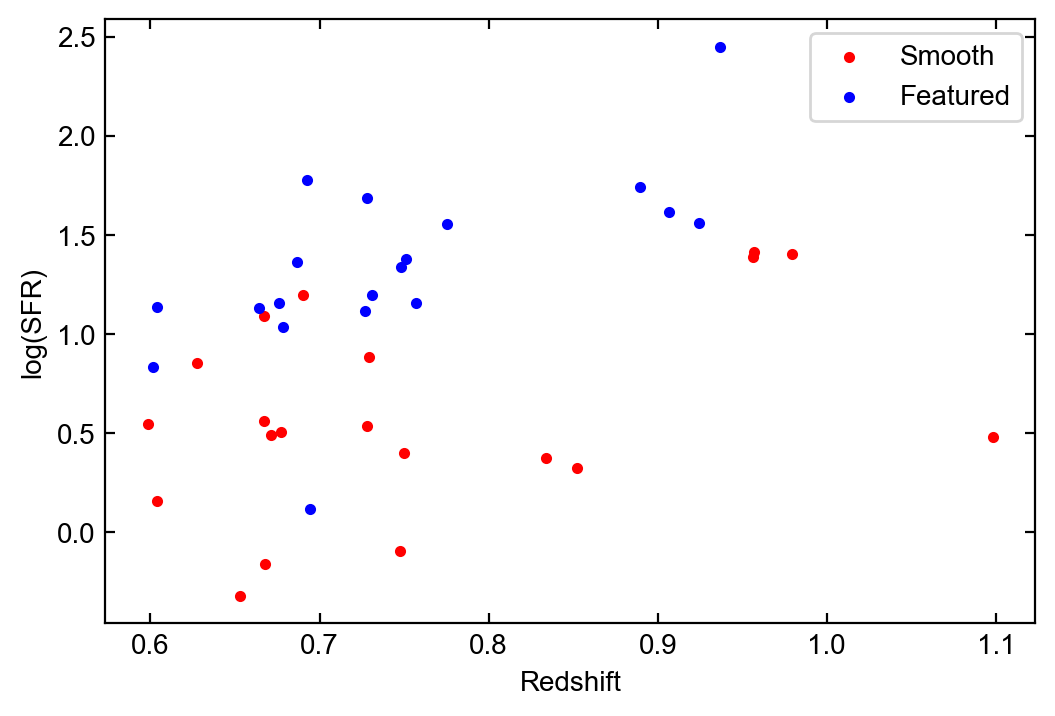

In [2]:
# Plot log(SFR) vs redshift
plot_data = [[gal_smooth["z_spec"], gal_smooth["lsfr_UV_IR"]],
             [gal_feat["z_spec"], gal_feat["lsfr_UV_IR"]]]

plotstart(plot_data, "scatter", dataset=[
          "Smooth", "Featured"], y_label="log(SFR)", x_label="Redshift")

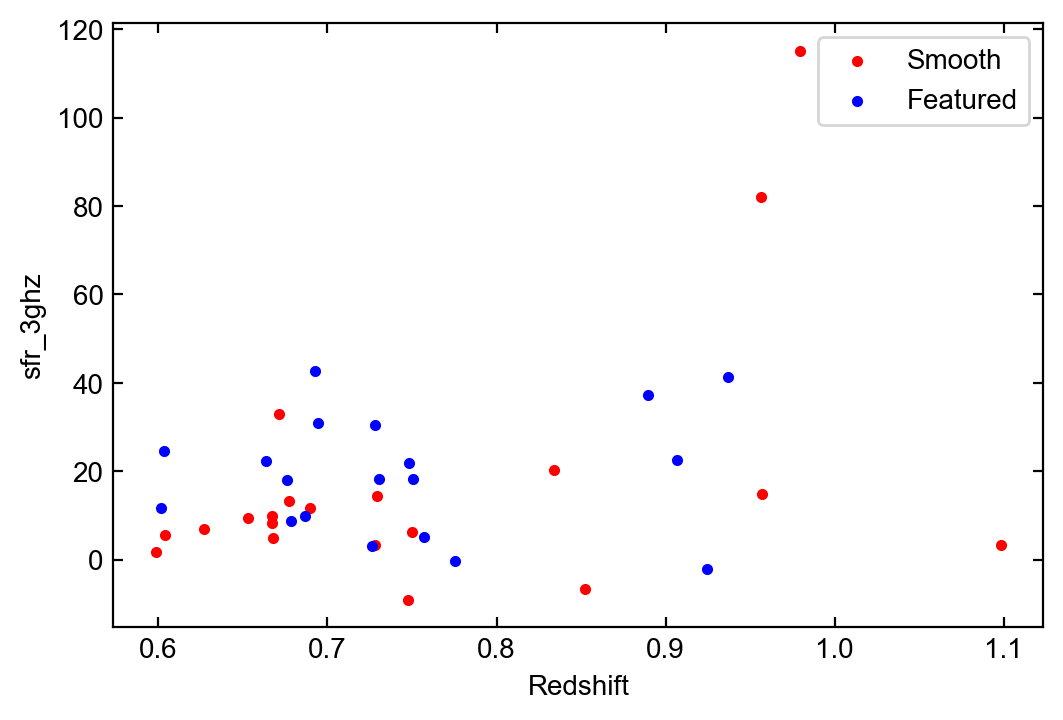

In [4]:
# Plot radio sfr vs redshift
plot_data = [[gal_smooth["z_spec"], gal_smooth["sfr_3ghz"]], #errors "esfr_3ghz"
             [gal_feat["z_spec"], gal_feat["sfr_3ghz"]]]

plotstart(plot_data, "scatter", dataset=[
          "Smooth", "Featured"], y_label="sfr_3ghz", x_label="Redshift")

## ML Approach
Combining SFR data from UV and IR, plotting relation A*uv + B*ir VS radio SFR to determine values of A and B that produce a correlation of 1

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

legac = pd.read_csv("/Users/nickmisiiuk/dev/PHYS369/data/legac.csv")
legac_1 = legac[(legac["ip_mag"] <= 22) & (legac["zp_mag"] <= 22)]

#Filter anomalies
legac_final = legac_1[(legac_1["lsfr_UV"]> -90) & (legac_1["lsfr_IR"]> -90)]
#Filter out the negative values
legac_final = legac_final[legac_final["sfr_3ghz"]> 0]

legac_final["sfr_3ghz"] = legac_final["sfr_3ghz"].apply(np.log)
# Define what are out model variables. We have identified that the best ones are:
x = legac_final[['lsfr_UV', 'lsfr_IR']]
# We want to predict the outcome, in this case either 0 (no claim) or 1 (claim)
y = legac_final['sfr_3ghz']

# splitting the data into a sub-set to train and the rest to test a simple model
# Using 20% of the sample drawn up randomly multiple times to train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# creating an object of LinearRegression class
LR = LinearRegression(fit_intercept=True)
# fitting the training data and providing us with a simple model and how outcome depends linearly on the 5 parameters picked up
LR.fit(x_train,y_train)
coeffs = LR.coef_
print("A", coeffs[0])
print("B", coeffs[1])

# Get the predicted values of sfr
sfr_predicted =  LR.predict(x_test)

# predicting the accuracy score
score=r2_score(y_test,sfr_predicted)

print('r^2:',score)
print('mean_sqrd_error:',mean_squared_error(y_test,sfr_predicted))
print('root_mean_squared error:',np.sqrt(mean_squared_error(y_test,sfr_predicted)))


[-0.15869064  1.12213507]


Arguing the validity of using these A and B values 

In [ ]:
from matplotlib import pyplot as plt

diff = y_test - sfr_predicted # Difference between predicted and legacy radio sfr
plt.scatter(sfr_predicted, diff, s=1, marker='.')
plt.show()

# Histogram stuff -- Mass_vs_Environment_with_histograms_DR4.py (line 60 onwards)
nullfmt   = NullFormatter()         # no labels - so they don't interfere/overlap
# definitions for the axes - to build in the 3 plot in one - NO NEED TO CHANGE
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left+width+0.01
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]
# end of definitions


In [ ]:
#Define coefficients A and B
A = -0.15869064
B = 1.12213507

#Create new column of combined UV + IR sfr
low_mag["SFR_final"] = A * low_mag["lsfr_UV"] + B * low_mag["lsfr_IR"]
low_mag["SFR_final"] = A * low_mag["lsfr_UV"] + B * low_mag["lsfr_IR"]

#Filter anomalies
new_df = low_mag[(low_mag["lsfr_UV"]> -90) & (low_mag["lsfr_IR"]> -90)]
#Filter out the negative values
new_df = new_df[new_df["sfr_3ghz"]> 0]

new_df["sfr_3ghz"] = new_df["sfr_3ghz"].apply(np.log)

plot_data = [[new_df["sfr_3ghz"], new_df["SFR_final"]]]

plotstart(plot_data, "scatter", y_label="SFR_final", x_label="fast_lmass", dataset=["Smooth", "Featured"])

In [ ]:
# mass bins [10-10.5; 10.5-11; 11-11.5]

### Task 2 -- Overdensity

In [ ]:
# Plot overdensity vs redshift
gal_smooth_2 = gal_smooth[gal_smooth["darvish_overdensity"] > -90]
gal_feat_2 = gal_feat[gal_feat["darvish_overdensity"] > -90]

plot_data = [[gal_smooth_2["z_spec"], gal_smooth_2["darvish_overdensity"]],
             [gal_feat_2["z_spec"], gal_feat_2["darvish_overdensity"]]]

plotstart(plot_data, "scatter", dataset=[
          "Smooth", "Featured"], y_label="Overdensity", x_label="Redshift")